<a href="https://colab.research.google.com/github/Nicolasalan/object_detection/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !nvidia-smi

Fri Jan 27 15:26:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.11

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ctgVYl2daQwMg0y4Lp13")
project = rf.workspace("tcc-dkicb").project("capacete-tlxv3")
dataset = project.version(1).download("yolov5")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=1da418e0a7cf70d79f4efdc9cd34730793352d8b50979c0ebdd9a113852e7df5
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to capacete-1 in yolov5pytorch:: 100%|██████████| 877/877 [00:00<00:00, 2396.59it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=250 imgsz=800

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/capacete-1/data.yaml, epochs=250, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nm

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  events.out.tfevents.1674833226.960354650e5e.1532.0  weights


/content


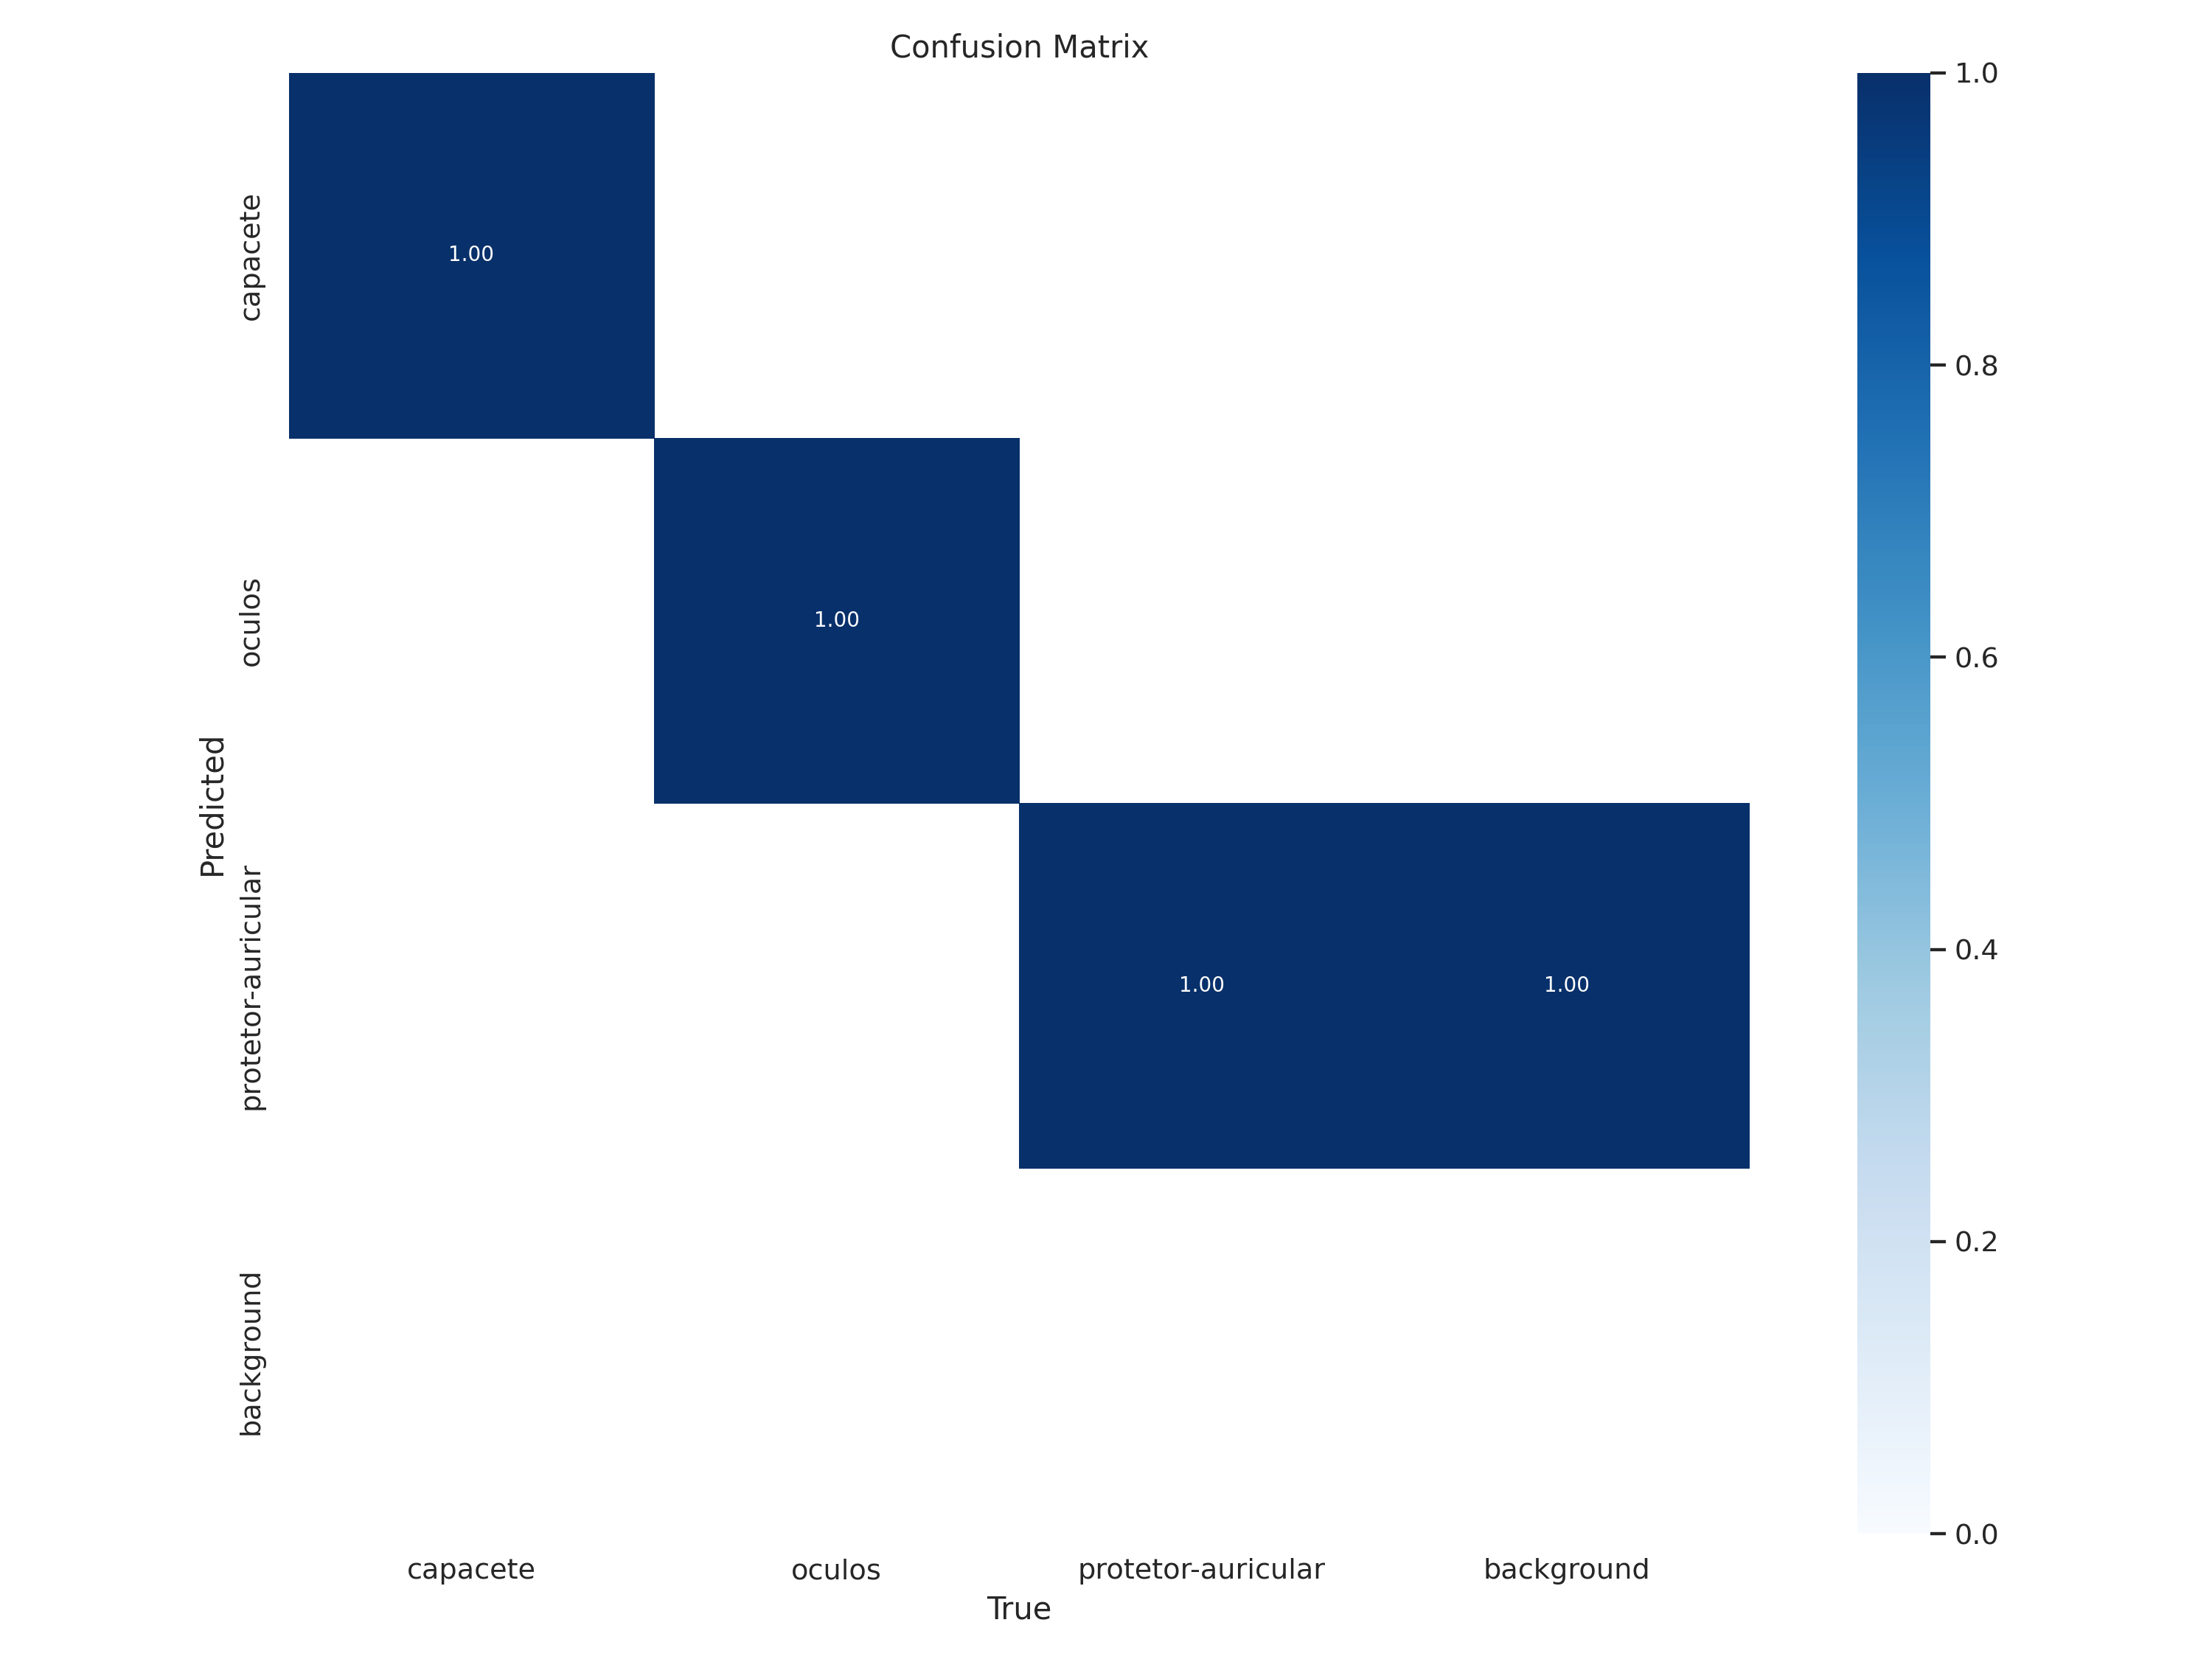

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/content


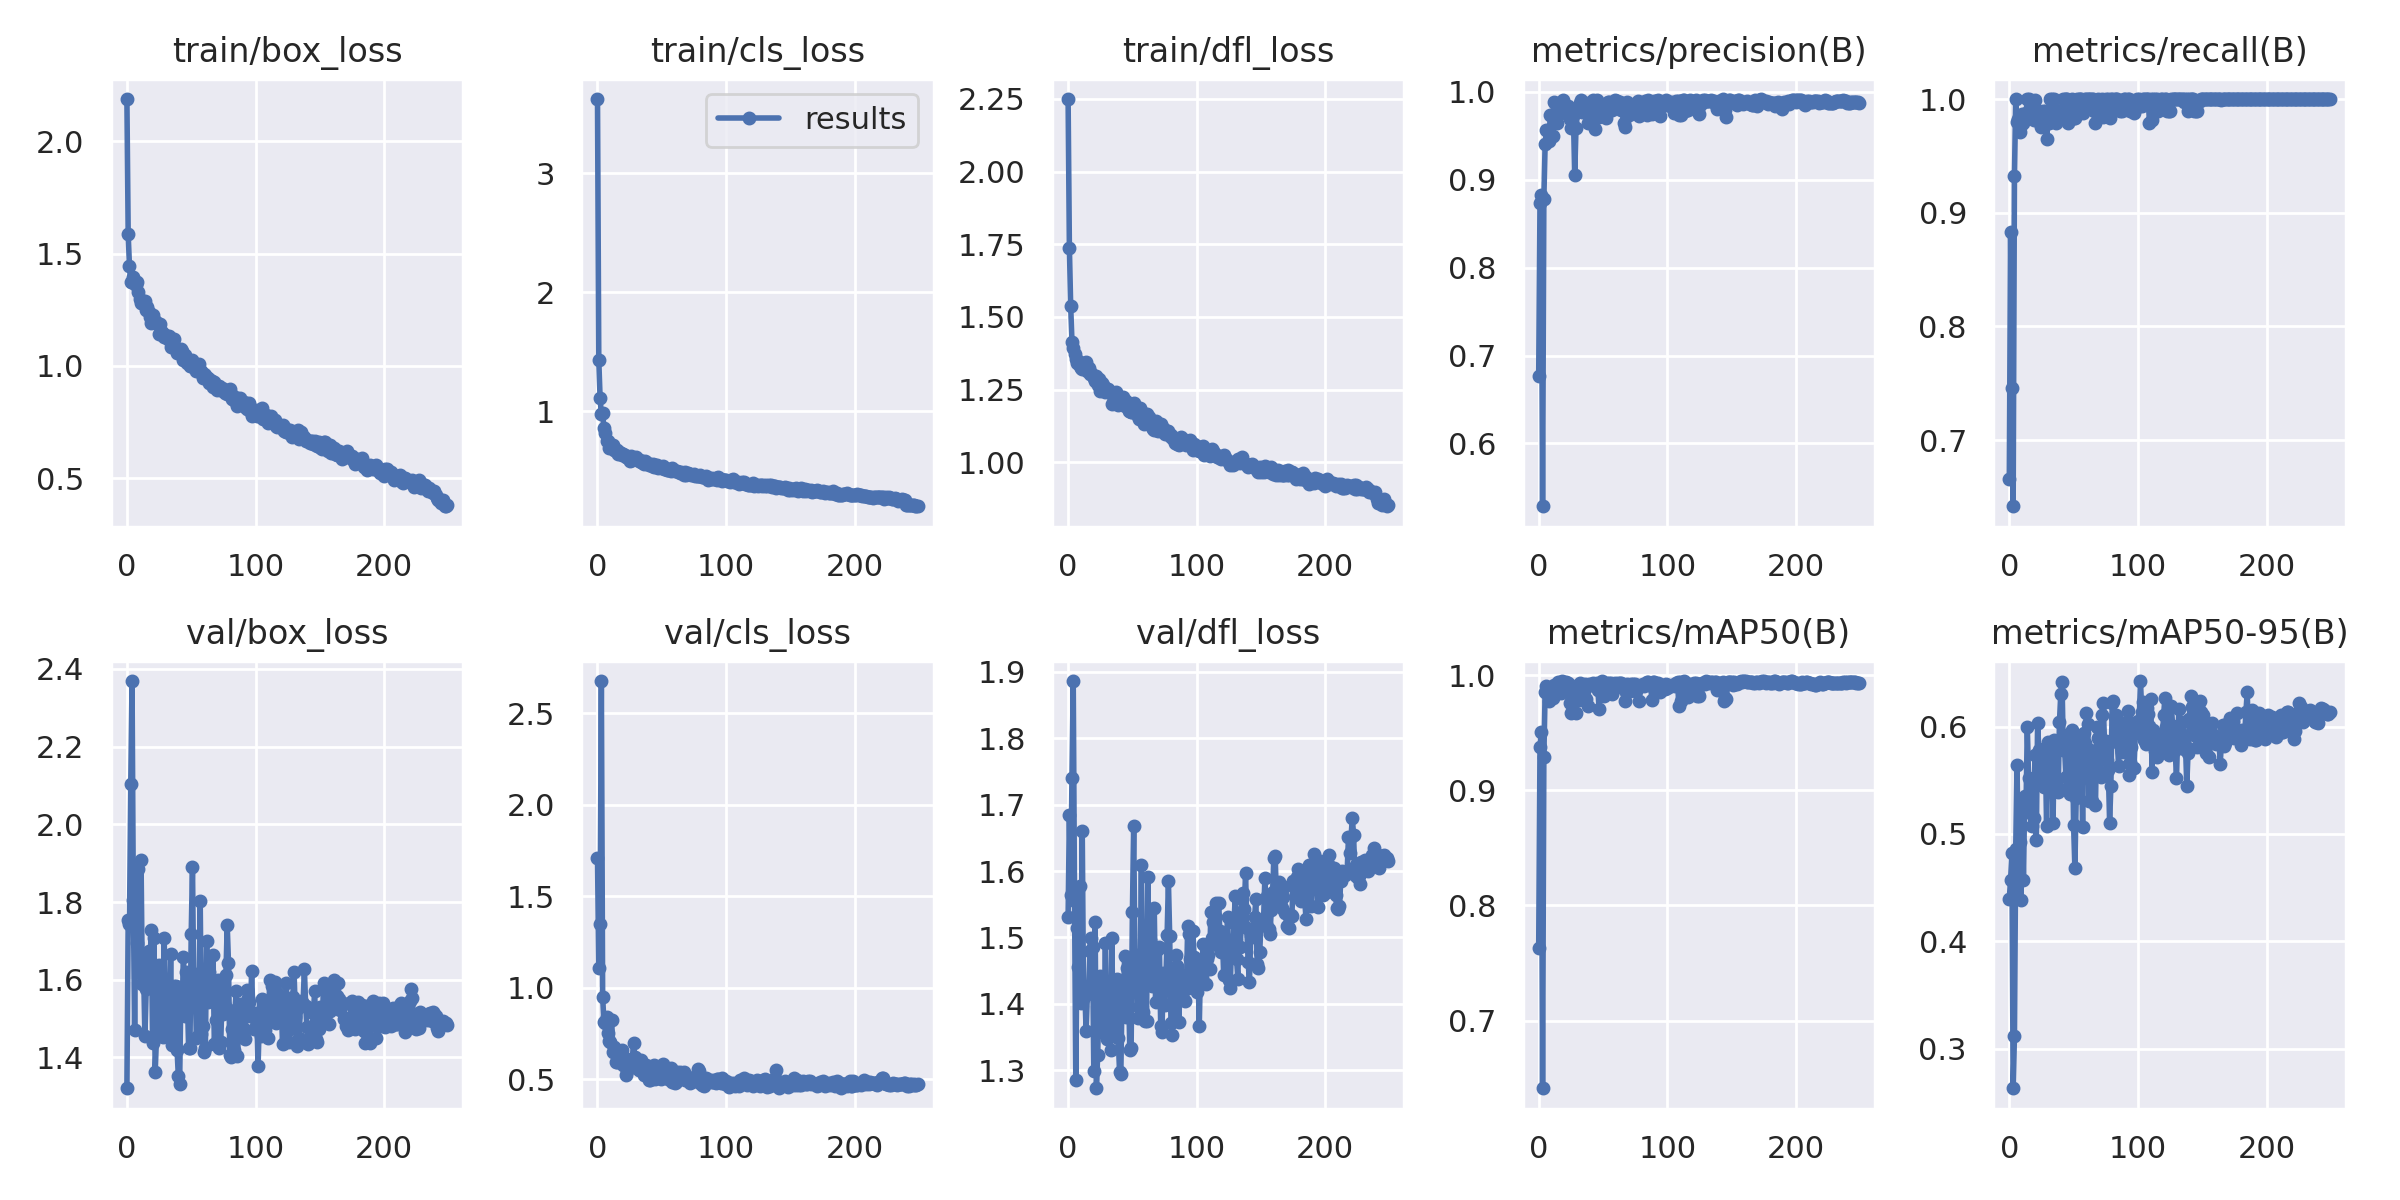

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


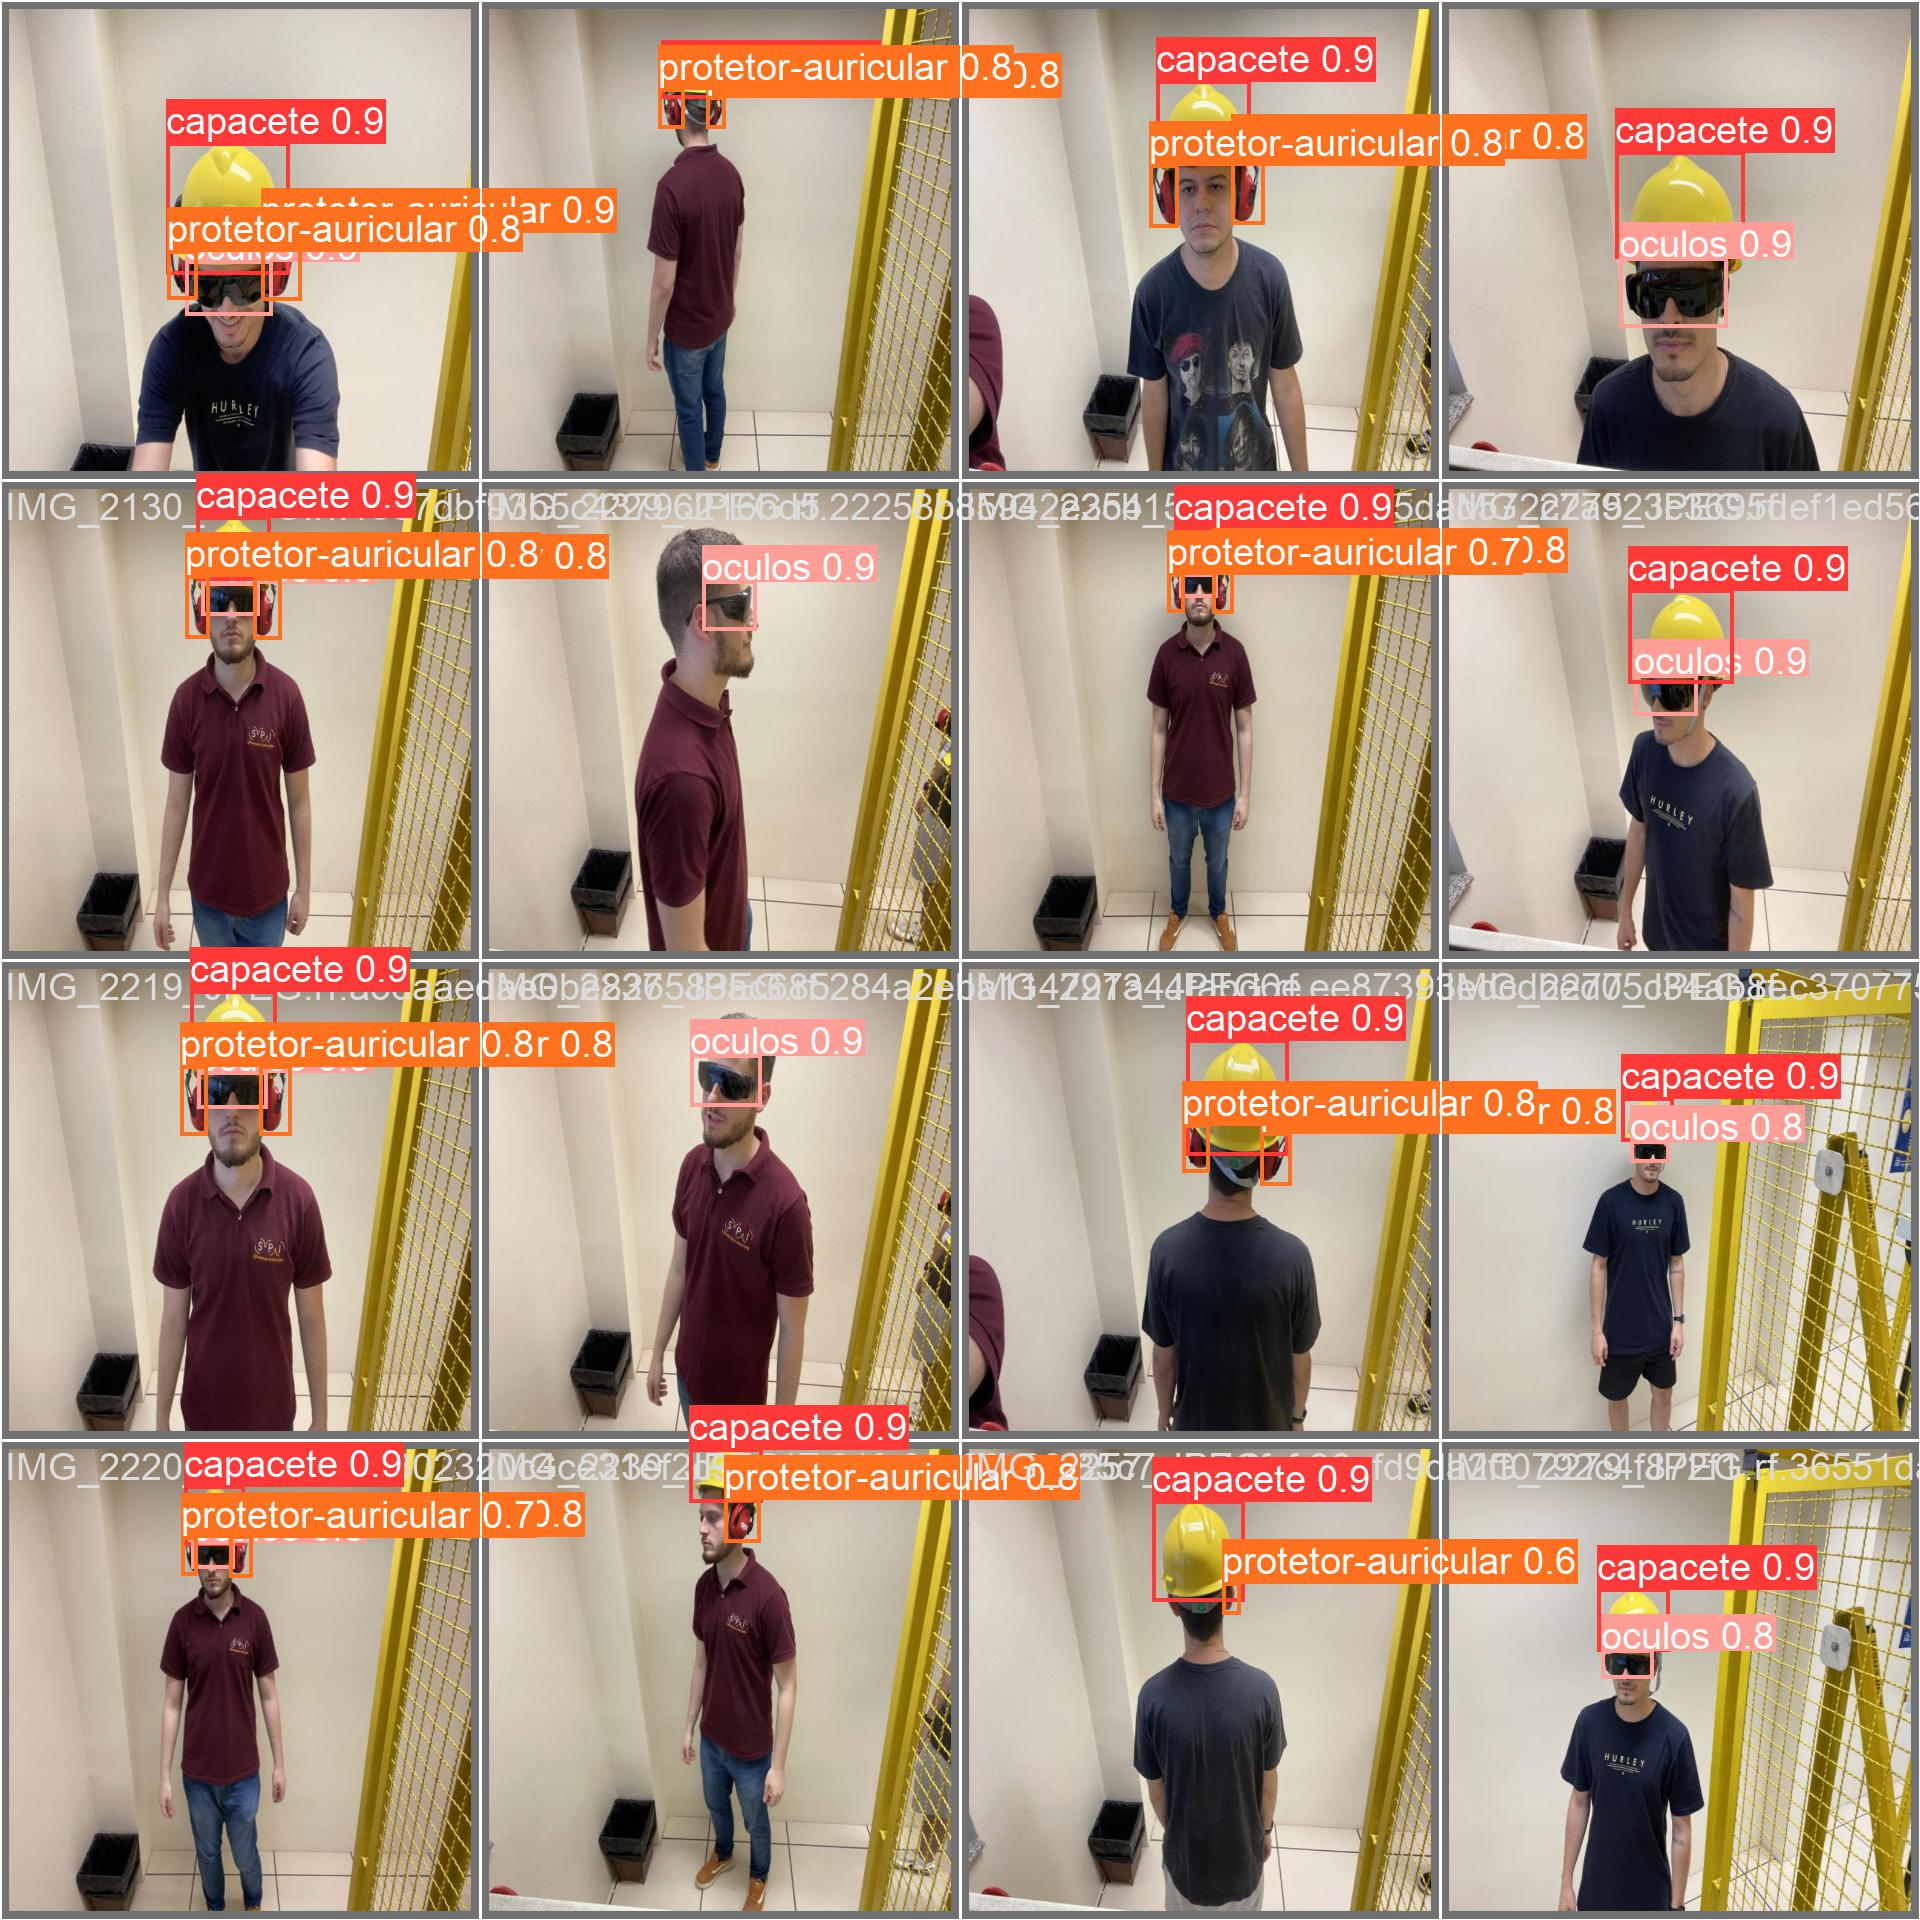

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/capacete-1/valid/labels.cache... 43 images, 0 backgrounds, 0 corrupt: 100% 43/43 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.35it/s]
                   all         43        124      0.975          1      0.989      0.661
              capacete         43         40       0.99          1      0.995      0.789
                oculos         43         32       0.99          1      0.995      0.624
    protetor-auricular         43         52      0.945          1      0.978      0.572
Speed: 1.8ms pre-process, 11.8ms inference, 0.0ms loss, 1.5ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.9 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/13 /content/datasets/football-players-detection-1/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 384x640 21 players, 15.0ms
image 2/13 /content/datasets/football-players-detection-1/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 384x640 1 goalkeeper, 21 players, 2 referees, 11.6ms
image 3/13 /content/datasets/football-players-detection-1/test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg: 384x640 1 goalkeeper, 20 players, 1 referee, 11.7ms
image 4/13 /content/datasets/football-players-detection-1/test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg: 384x640 1 goalkeeper, 20 players, 4 referees, 11.6ms
image 5/13 /content/datasets/football-players-detection-1/test/images/4b770a_3_6_png.rf.d0d9403f2f73ca0da7a6a1373c02b749.jpg:

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
model = YOLO('/content/runs/detect/train3/weights/best.pt')
results = model.predict(source='/content/img.jpg', conf=0.25)

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


In [ ]:
results[0].boxes.xyxy

tensor([[ 95., 303., 472., 462.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.73589], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([1.], device='cuda:0')

------------------------------------------------------------

In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2

model = YOLO("/content/runs/detect/train3/weights/best.pt") # passa o arquivo do peso aqui
im1 = Image.open("/content/img.jpg") # coloca sua imagem
results = model.predict(source=im1, save=True) # salva o arquivo 

# 0 for webcam
results = model.predict(source="0") # camera
results = model.predict(source="folder", show=True) # prediz e salva


# from ndarray
#im2 = cv2.imread("bus.jpg")
#results = model.predict(source=im2, save=True, save_txt=True)  # save predictions as labels

# from list of PIL/ndarray
#results = model.predict(source=[im1, im2])

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
Results saved to runs/detect/predict
